<h1 align="center">PROJECT:</h1>
<h2 style="display:block; margin-top:5px;" align="center">Classification of glial tumors using radiomic features and XAI models</h2>
___________________________________________________________________________________________________________________________
<h2 style="display:block; margin-top:5px;" align="center">BIOMEDICAL DATA SCIENCE</h2>   
<h3 style="display:block; margin-top:5px;" align="center">Universitat Politècnica de València</h3>
<h3 style="display:block; margin-top:5px;" align="center">Year 2023-2024</h3>
<br>
<h3 style="display:block; margin-top:5px;" align="center">EVA CANTÍN LARUMBE, MERES KURSATZ AND FRANCESCO PIO CAPOCCELLO</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)
X

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,174.0,650.0,2.588828e+09,4.300822,324.0,2.196185,1085.0,357.892864,169.490477,256.0,...,39.698866,39.115214,35.693137,39.874804,15651.083333,29.130457,0.795019,3806.004555,0.243178,15709.0
1,427.0,826.0,1.555094e+09,4.670797,229.5,2.685919,1077.0,626.103994,128.342289,632.0,...,22.671568,23.769729,24.413111,27.000000,3703.416667,18.059959,0.727742,1590.651380,0.429509,3731.0
2,212.0,697.0,6.472778e+09,4.796344,283.0,2.510939,1170.0,459.821288,154.048324,457.0,...,42.720019,46.238512,44.944410,46.914816,26368.250000,37.044511,0.752399,5694.078769,0.215945,26400.0
3,429.9,856.0,6.238777e+09,4.777974,210.0,4.546907,1463.0,633.593407,134.813886,612.0,...,63.820060,36.055513,54.626001,64.327288,14306.666667,26.111726,0.597259,4771.779131,0.333535,14410.0
4,358.0,649.0,1.212578e+10,4.199889,143.0,3.011379,1056.0,508.111091,88.454307,511.0,...,53.665631,57.706152,59.774577,60.646517,44537.541667,43.406304,0.634706,9573.316675,0.214949,44774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,3754.0,7206.9,1.021032e+12,7.652972,1937.0,2.885087,11777.0,5592.867096,1065.960253,5670.0,...,53.000000,49.040799,41.146081,53.972215,30850.416667,32.945548,0.717464,6630.174444,0.214914,30932.0
355,648.0,1422.0,2.668548e+10,5.384028,463.0,3.096456,2749.0,993.503008,246.611399,972.0,...,35.227830,66.910388,67.268120,69.778220,24684.666667,31.414140,0.597705,6859.333413,0.277878,24765.0
356,2250.2,5166.0,2.305284e+11,7.453490,1575.5,2.531188,7216.0,3680.912932,891.534753,3644.0,...,36.055513,46.957428,41.303753,47.686476,15592.375000,26.732679,0.693717,4350.875982,0.279039,15643.0
357,1652.0,5113.0,6.660589e+11,7.591514,2107.0,2.602830,8575.0,3346.971976,1086.213192,3359.0,...,52.354560,54.083269,51.039201,56.142675,51393.333333,41.408206,0.820776,8144.490174,0.158474,51455.0


# 1. Data preparation and visualisation
We observe a clear imbalance in the data

In [3]:
y['diagnostic'].value_counts()

HGG    283
LGG     76
Name: diagnostic, dtype: int64

## 1.1 Oversampling in the train dataset

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [4]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [5]:
X_over, y_over = oversample.fit_resample(X, y)

In [6]:
X_over.columns

Index(['original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Median', 'original_firstorder_Minimum',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
       'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
       'original_glcm_ClusterTendency', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_

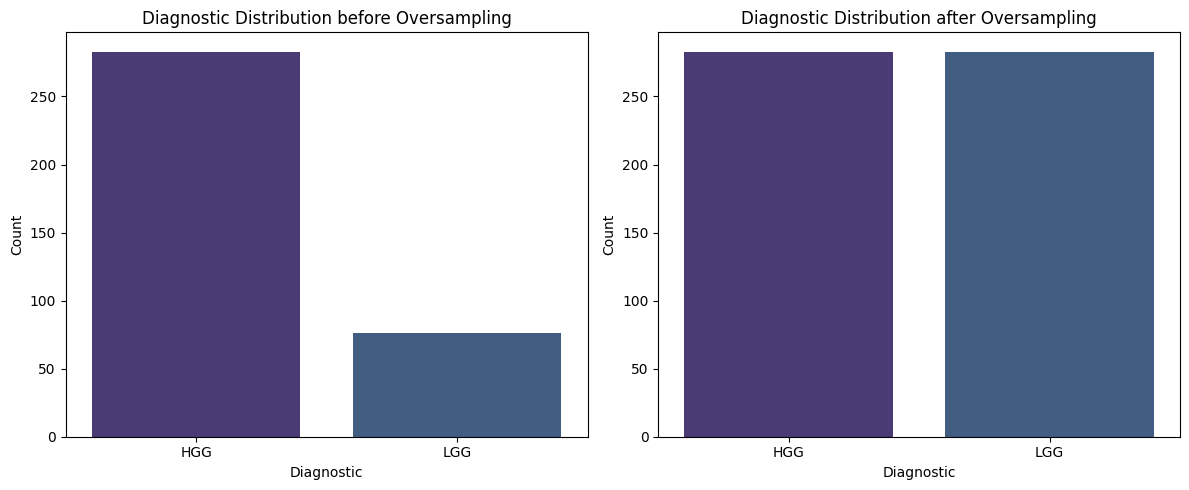

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to use Viridis color palette
sns.set_palette("viridis")

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First count plot - before oversampling
sns.countplot(x="diagnostic", data=y, ax=axes[0])
axes[0].set_title("Diagnostic Distribution before Oversampling")
axes[0].set_xlabel("Diagnostic")
axes[0].set_ylabel("Count")

# Second count plot - after oversampling
sns.countplot(x="diagnostic", data=y_over, ax=axes[1])
axes[1].set_title("Diagnostic Distribution after Oversampling")
axes[1].set_xlabel("Diagnostic")
axes[1].set_ylabel("Count")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## 1.2 Scale the data
As we can observe in the df, the data is in different units and magnitudes. It's essential to have it standarised.

In [8]:
X_cols = X_over.columns

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_over)

In [10]:
X = pd.DataFrame(X, columns=X_cols)
X.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.463973,-0.340569,-0.236094,-0.076428,-0.068625,-0.601765,-0.380660,-0.425353,-0.114048,-0.498158,...,-0.666622,-0.912300,-1.016952,-1.093766,-0.761233,-0.687822,1.382289,-0.860185,-0.248822,-0.761569
1,-0.205236,-0.242103,-0.238548,0.170797,-0.232781,-0.464142,-0.383432,-0.225159,-0.254346,-0.209067,...,-1.692044,-1.639900,-1.560462,-1.689767,-1.041704,-1.531257,0.796559,-1.180562,1.204203,-1.042420
2,-0.425111,-0.314274,-0.226876,0.254691,-0.139846,-0.513314,-0.351202,-0.349273,-0.166699,-0.343617,...,-0.484682,-0.574552,-0.571195,-0.767870,-0.509648,-0.084869,1.011226,-0.587137,-0.461194,-0.510894
3,-0.202270,-0.225319,-0.227432,0.242415,-0.266655,0.058822,-0.249659,-0.219569,-0.232280,-0.224444,...,0.786009,-1.057375,-0.104704,0.038188,-0.792793,-0.917812,-0.339453,-0.720517,0.455790,-0.792027
4,-0.275801,-0.341128,-0.213459,-0.143874,-0.383041,-0.372683,-0.390710,-0.313230,-0.390347,-0.302099,...,0.174487,-0.030819,0.143372,-0.132202,-0.083124,0.399821,-0.013433,-0.026134,-0.468954,-0.080074


In [11]:
X.to_csv("X_scaled.csv", index=False)
y_over.to_csv("y_over.csv", index=False)

# 2. Correlation of variables

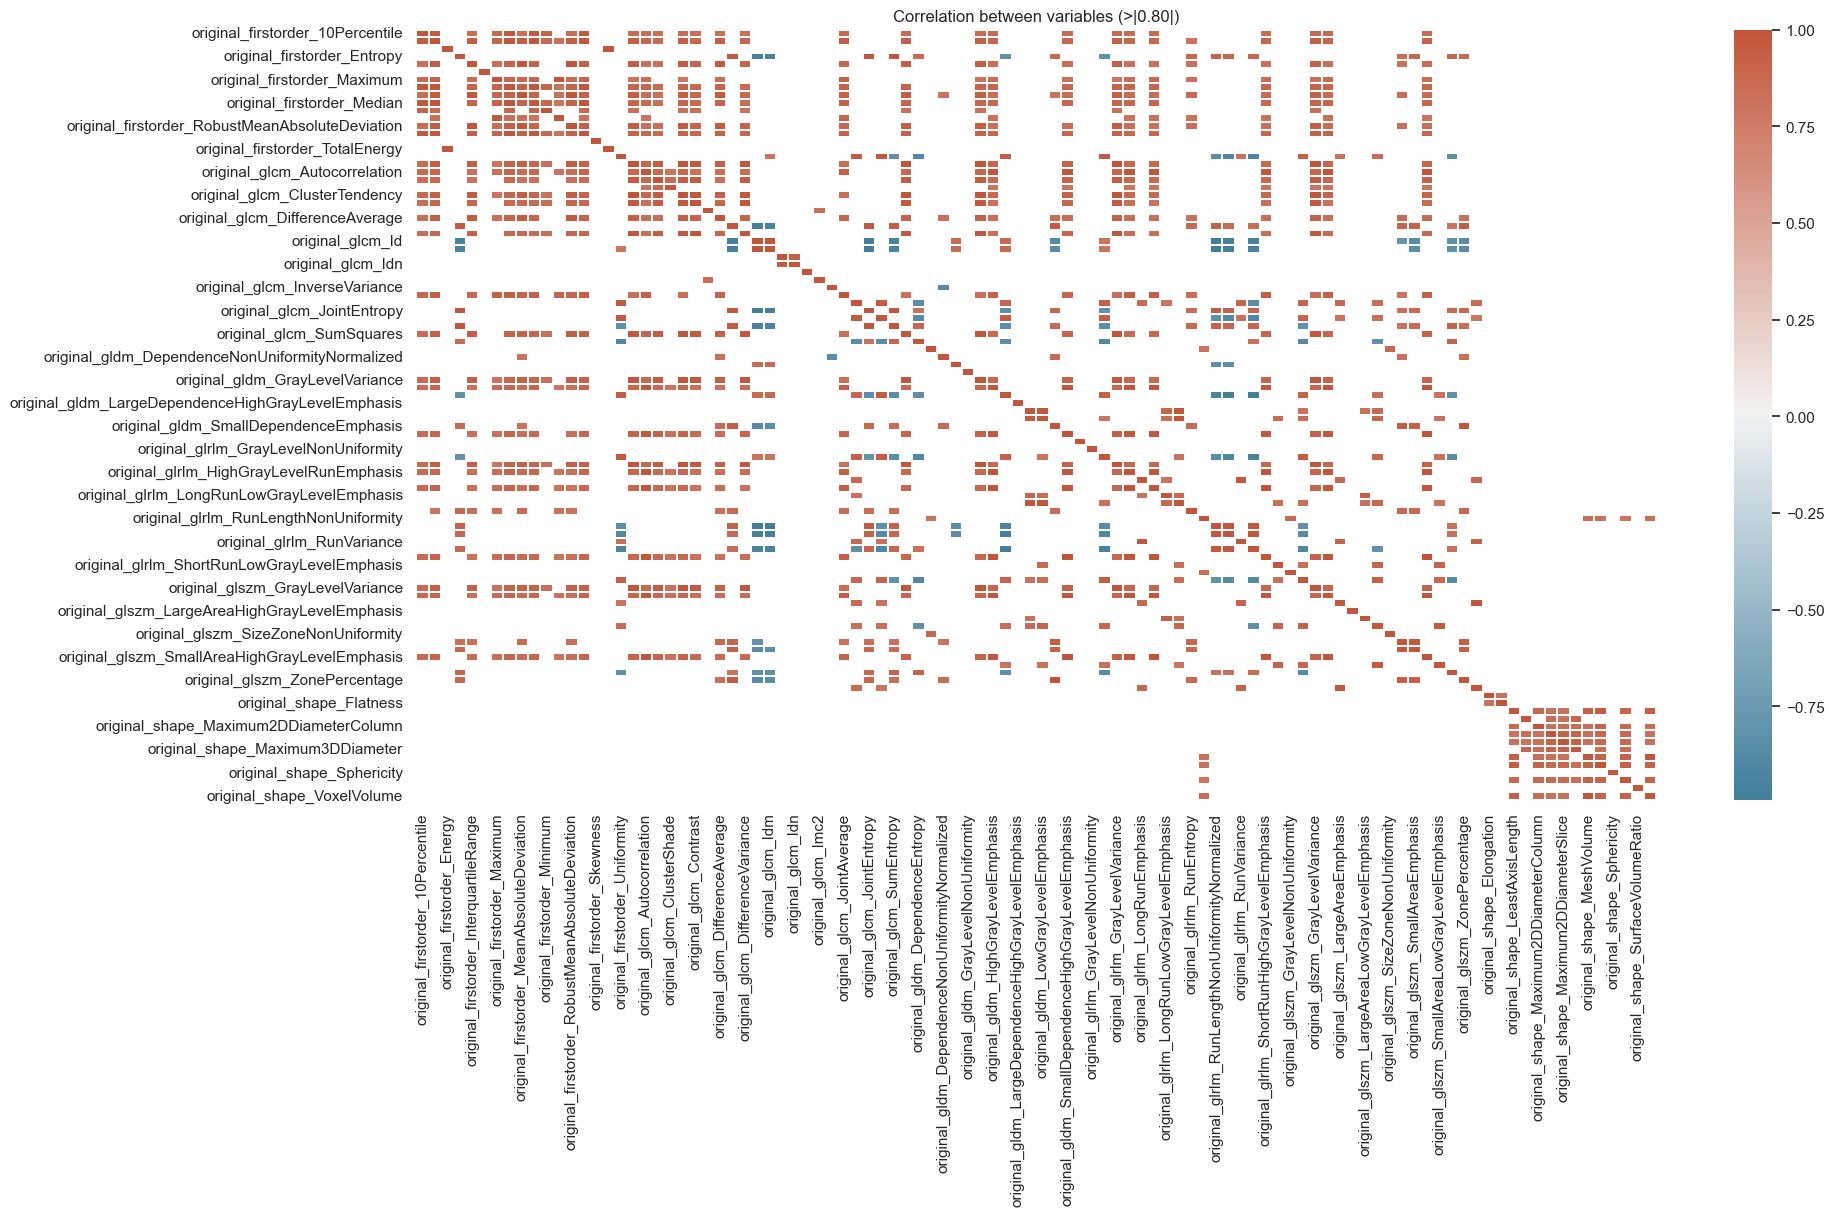

In [12]:
correlation = X.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
masked_corr_matrix = correlation[(correlation > 0.80) | (correlation < -0.80)]
plt.figure(figsize=(20, 10))
sns.heatmap(masked_corr_matrix, 
            cmap=cmap, 
            annot=False, 
            fmt='.2f', 
            linewidths=.05).set_title("Correlation between variables (>|0.80|)")
plt.show()

# 3. Features selection and reduction

## 3.0 Train and test split

In [13]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_over, test_size=0.20, random_state=11)
# line below necessary for using f1-score
#y_test1 = y_test1.replace('LGG',0).replace('HGG',1)
X_train1.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
74,-0.269664,-0.337212,-0.229980,-0.089710,-0.396937,0.228482,-0.241341,-0.315223,-0.374854,-0.312863,...,-0.350724,0.833143,-1.039372,0.722102,-0.683464,-0.891914,-0.582727,-0.537020,0.338801,-0.683771
243,0.111794,-0.077620,-0.077866,0.012893,-0.207593,-0.611790,-0.207378,0.006056,-0.273682,0.024666,...,0.610250,0.968001,0.888529,0.786784,0.680869,0.753610,-0.749836,0.891982,-0.534400,0.681399
214,-0.596921,-0.627014,-0.241416,-1.229050,-0.534169,0.163343,-0.643702,-0.628963,-0.582784,-0.637321,...,-0.255910,0.236698,0.258749,0.001987,-0.213119,-0.033015,-0.493832,-0.022759,-0.226285,-0.213278
486,-0.538628,-0.339450,-0.208034,0.334502,-0.122475,0.775241,0.238651,-0.441632,-0.086506,-0.485856,...,0.783649,0.579409,0.712635,0.463677,0.929908,1.077412,0.548000,0.563690,-0.931135,0.928041
442,0.104124,-0.083215,-0.233885,0.101195,-0.261443,-0.448015,-0.255550,-0.007552,-0.286487,0.003906,...,-0.733548,-1.371621,-1.413698,-0.975102,-1.033814,-1.248452,0.448032,-1.152657,1.298004,-1.034331


## 3.1 PCA

In [14]:
from sklearn.decomposition import PCA
#we want to preserve the 95% of variability of data
pca = PCA(.95)
components = pca.fit_transform(X)
pca2 = pca.fit_transform(X)

In [15]:
import numpy as np
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)

,VarPerc,cumVarPerc
0,40.685404,40.685404
1,18.759633,59.445037
2,14.197941,73.642978
3,6.098105,79.741083
4,2.940909,82.681992
5,2.528034,85.210026
6,2.279698,87.489724
7,1.906062,89.395786
8,1.562264,90.958050
9,1.416462,92.374513


The new X dataset will be:

In [16]:
principal_df = pd.DataFrame(data = pca2
             , columns = ["PCA"+str(i+1) for i in range(len(expVar))])

principal_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14
0,-0.921821,-1.244404,3.375655,-0.357387,-1.463755,0.704515,0.086320,0.077817,0.687261,-0.712802,-0.449554,0.773156,-0.292283,0.352186
1,0.360873,-1.723441,6.354542,0.961928,-2.276731,0.718637,0.929169,1.760671,1.439455,-0.246770,0.656240,-0.422995,0.933219,-0.005148
2,-0.059693,-2.046729,2.377930,0.523079,-1.985129,0.653317,-0.049878,0.480730,0.679621,-0.203693,-0.105761,0.216683,-0.263612,0.415990
3,0.363325,-2.201157,2.859773,2.039533,2.576871,-1.824783,-0.090093,0.151724,0.157160,-0.037726,-0.593197,1.345539,-0.429429,0.230588
4,-1.084661,-1.984076,0.403686,0.278910,-0.493237,-0.255246,-0.082595,1.166273,0.495997,1.142834,-0.127562,0.075198,-0.345871,-0.301515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2.329708,-1.360292,7.799799,1.494471,-0.601244,-0.678916,0.148296,1.003012,0.316957,-1.730032,2.413809,-0.920883,1.380627,0.042252
562,-2.172906,-1.515838,0.160301,-1.002315,1.299458,-0.748182,-0.290831,0.927390,-0.441611,1.182685,-0.525570,-0.440224,0.139277,-0.232505
563,-2.891961,-0.646259,-4.037550,-1.958762,0.106631,-0.802295,1.232238,0.558784,0.226934,0.741077,0.229500,0.990359,1.391427,0.493971
564,-2.184751,-0.014139,-2.810316,-3.800859,-0.383470,0.585582,1.531821,0.775439,-3.277579,1.141041,0.655462,0.365947,1.533291,1.047573


<Figure size 640x480 with 0 Axes>

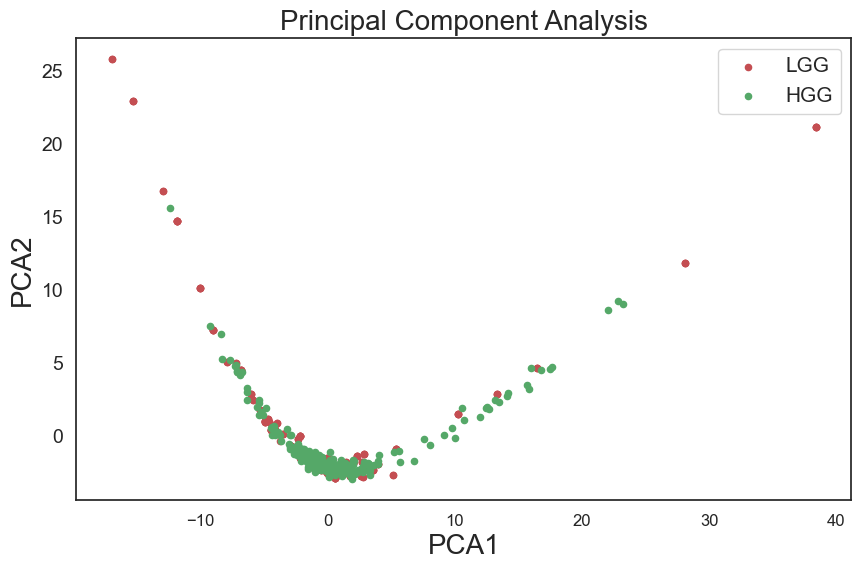

In [17]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA1',fontsize=20)
plt.ylabel('PCA2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['LGG', 'HGG']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y_over['diagnostic'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PCA1']
               , principal_df.loc[indicesToKeep, 'PCA2'], c = color, s = 20)

plt.legend(targets,prop={'size': 15})

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(principal_df, y_over, test_size=0.20, random_state=11)

Looking at this plot, the principal components are not able to separate both populations: LGG and HGG. However, we will make some experiments using PCA as a feature reduction method.

## 3.2 Logistic Regression Feature Selection

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), k_features=8, 
                 forward=True, 
                 floating=False,
                 verbose=2,               
                 scoring='f1_macro',
                 cv=5,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train1, y_train1)
selected_features = X_train1.columns[list(sfs.k_feature_idx_)]
print(selected_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished

[2024-01-05 17:56:28] Features: 1/8 -- score: 0.7734587974808226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  84 out of  99 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    1.9s finished

[2024-01-05 17:56:30] Features: 2/8 -- score: 0.8336658793544718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    1.8s finished

[2024-01-05 17:56:32] Features: 3/8 -- score: 0.8380298450180588[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]

Index(['original_firstorder_Kurtosis', 'original_firstorder_Variance',
       'original_glcm_Correlation', 'original_glcm_Idn',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_glszm_GrayLevelVariance', 'original_shape_Flatness',
       'original_shape_SurfaceVolumeRatio'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    1.9s finished

[2024-01-05 17:56:41] Features: 8/8 -- score: 0.8449173763173766

In [20]:
X_train3 = X_train1[selected_features]
X_test3 = X_test1[selected_features]

## 3.3 Correlation Feature Selection

In [21]:
y_trans = y_train1.replace('LGG',0).replace('HGG',1)
correlations = []
for col in X_train1.columns:
    correlations.append(X_train1[col].corr(y_trans.diagnostic))

print(np.array(sorted(correlations, key=abs))[-30:])

[ 0.1811693  -0.18372825 -0.19261861 -0.2028745  -0.20720599 -0.20955118
 -0.21367386 -0.21877451  0.21955121 -0.22387728 -0.22420323 -0.22704325
 -0.23238062 -0.23242922  0.23555826 -0.23691232 -0.24292037 -0.24531242
 -0.24622158 -0.25008478  0.2564111   0.26954499  0.28019414  0.28392478
 -0.29073369  0.30179946 -0.30321325  0.37285728 -0.44571316 -0.522831  ]


In [22]:
best_features = []
for i in range(22):
    idx = np.argmax(np.absolute(correlations))
    correlations[idx] = 0    
    best_features.append(X_train1.columns[idx])
X_train4 = X_train1[best_features]
X_test4 = X_test1[best_features]
print(best_features)

['original_glcm_Idn', 'original_glcm_Idmn', 'original_glcm_Imc1', 'original_firstorder_Kurtosis', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_shape_SurfaceArea', 'original_shape_Sphericity', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunPercentage', 'original_glcm_Idm', 'original_gldm_LargeDependenceEmphasis', 'original_glcm_Id', 'original_glrlm_GrayLevelNonUniformity', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glcm_DifferenceEntropy', 'original_shape_MeshVolume', 'original_shape_VoxelVolume', 'original_shape_Maximum2DDiameterRow', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_firstorder_Uniformity', 'original_glcm_JointEntropy']


# 4. Explainable models 
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# helper function for evaluating a given classifier
def evaluate_classifier(y_test,pred):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.grid(False)
    plt.show()

In [24]:
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score,labels=['LGG','HGG'], average="binary", pos_label="HGG")
#scorer = make_scorer(accuracy_score)

## 4.1 Random Forest Classifier

### A. With no preprocessing

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [26]:
from sklearn.model_selection import GridSearchCV
#rf_clf = RandomForestClassifier(random_state=42)

#param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth' : list(i for i in range(2,11)),
#'criterion' :['gini', 'entropy']}

#CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_rfc1.fit(X_train1, y_train1.diagnostic)
#print("Best Parameters:", CV_rfc1.best_params_)
#print("Best Score:", CV_rfc1.best_score_)

The optimal configuration is `n_estimators=100`, `max_features=log2`, `max_depth=7` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [27]:
rf1 = RandomForestClassifier(max_depth=7, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf1.fit(X_train1, y_train1.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)

In [28]:
#save the model to not run everything from scratch
dump(rf1, 'RF1.joblib')

['RF1.joblib']

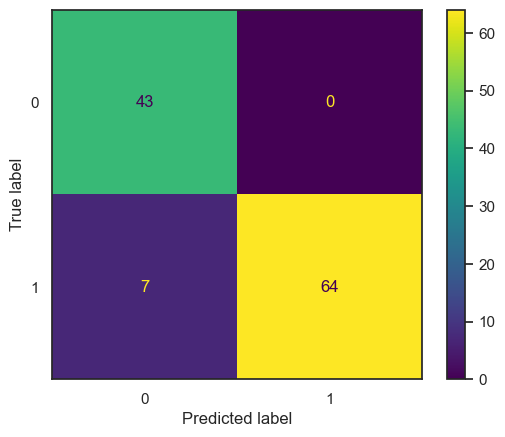

None
              precision    recall  f1-score   support

         HGG       0.86      1.00      0.92        43
         LGG       1.00      0.90      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



In [29]:
rf1 = load('RF1.joblib')
y_pred = rf1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### B. Features selection with PCA

In [30]:
#from sklearn.model_selection import GridSearchCV
#rf_clf = RandomForestClassifier(random_state=42)

#param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'],
    #'max_depth' : list(i for i in range(2,11)),'criterion' :['gini', 'entropy']}

#CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_rfc1.fit(X_train2, y_train2.diagnostic)
#print("Best Parameters:", CV_rfc1.best_params_)
#print("Best Score:", CV_rfc1.best_score_)

The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [31]:
rf2 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf2.fit(X_train2, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)

In [32]:
#save the model to not run everything from scratch 
dump(rf2, 'RF2.joblib')

['RF2.joblib']

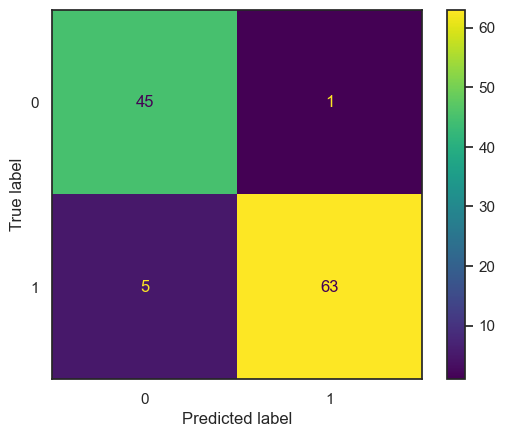

None
              precision    recall  f1-score   support

         HGG       0.90      0.98      0.94        46
         LGG       0.98      0.93      0.95        68

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [33]:
rf2 = load('RF2.joblib')
y_pred2 = rf2.predict(X_test2)
# Classification Report
print(evaluate_classifier(y_pred2, y_test1))
print(classification_report(y_pred2, y_test1))

### C. Features selection with Logistic Regression

In [34]:
#from sklearn.model_selection import GridSearchCV

#rf_clf = RandomForestClassifier(random_state=42)

#param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'], 
#'max_depth' : list(i for i in range(2,11)),'criterion' :['gini', 'entropy']}

#CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_rfc1.fit(X_train3, y_train1.diagnostic)
#print("Best Parameters:", CV_rfc1.best_params_)
#print("Best Score:", CV_rfc1.best_score_)

The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=8` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [35]:
rf3 = RandomForestClassifier(max_depth=8, random_state=42, criterion="entropy", max_features="sqrt", n_estimators=500)
rf3.fit(X_train3, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [36]:
#save the model to not run everything from scratch 
dump(rf3, 'RF3.joblib')

['RF3.joblib']

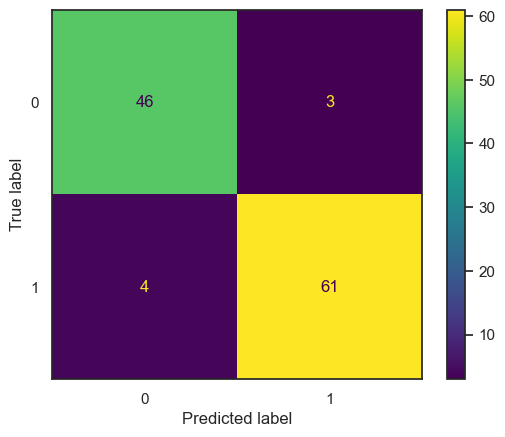

None
              precision    recall  f1-score   support

         HGG       0.92      0.94      0.93        49
         LGG       0.95      0.94      0.95        65

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [37]:
rf3 = load('RF3.joblib')
y_pred3 = rf3.predict(X_test3)
# Classification Report
print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

### D. Features selection with Correlation

In [38]:
from sklearn.model_selection import GridSearchCV

#rf_clf = RandomForestClassifier(random_state=42)

#param_grid = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2'], 
#'max_depth' : list(i for i in range(2,11)),'criterion' :['gini', 'entropy']}

#CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_rfc1.fit(X_train3, y_train1.diagnostic)
#print("Best Parameters:", CV_rfc1.best_params_)
#print("Best Score:", CV_rfc1.best_score_)

The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=9` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [39]:
rf4 = RandomForestClassifier(max_depth=9, random_state=42, criterion="entropy", max_features="sqrt", n_estimators=100)
rf4.fit(X_train4, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=42)

In [40]:
#save the model to not run everything from scratch 
dump(rf4, 'RF4.joblib')

['RF4.joblib']

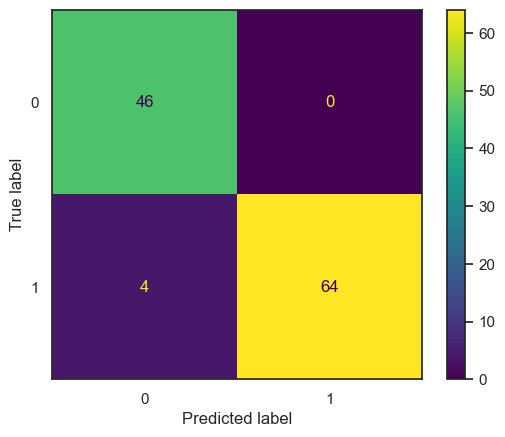

None
              precision    recall  f1-score   support

         HGG       0.92      1.00      0.96        46
         LGG       1.00      0.94      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [41]:
rf4 = load('RF4.joblib')
y_pred4 = rf4.predict(X_test4)
# Classification Report
print(evaluate_classifier(y_pred4, y_test1))
print(classification_report(y_pred4, y_test1))

## 3.2 Logistic Regression Classifier

### A. With no preprocessing

In [42]:
from sklearn.model_selection import GridSearchCV
#lr_clf = LogisticRegression(random_state=42)

#param_grid = { 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    #'C': [0.5,1,5,10], 'multi_class': ['auto', 'ovr', 'multinomial']}

#CV_lrc1 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_lrc1.fit(X_train1, y_train1.diagnostic)
#print("Best Parameters:", CV_lrc1.best_params_)
#print("Best Score:", CV_lrc1.best_score_)

The optimal configuration is `C: 5`, `multi_class: multinomial`, `solver: newton-cg`. We train the model again and we save it to not build it from scratch.

In [43]:
lr1 = LogisticRegression(C=5, multi_class='multinomial', solver='newton-cg', random_state=42)
lr1.fit(X_train1, y_train1.diagnostic)

LogisticRegression(C=5, multi_class='multinomial', random_state=42,
                   solver='newton-cg')

In [44]:
#save the model to not run everything from scratch
dump(lr1, 'LR1.joblib')

['LR1.joblib']

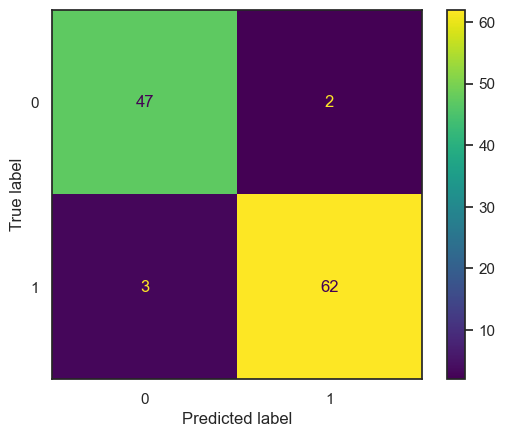

None
              precision    recall  f1-score   support

         HGG       0.94      0.96      0.95        49
         LGG       0.97      0.95      0.96        65

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [45]:
lr1 = load('LR1.joblib')
y_pred = lr1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### B. Features selection with PCA

In [46]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#lr_clf = LogisticRegression(random_state=42)

#param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    #'C': [0.005,0.01,0.1,0.5,1,3], 'multi_class': ['auto', 'ovr', 'multinomial']}
    
#CV_lrc2 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_lrc2.fit(X_train2, y_train1.diagnostic)
#print("Best Parameters:", CV_lrc2.best_params_)
#print("Best Score:", CV_lrc2.best_score_)

The optimal configuration is `C: 0.01`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [47]:
lr2 =  LogisticRegression(C=0.01, multi_class='multinomial', solver='lbfgs', random_state=42)
lr2.fit(X_train2, y_train1.diagnostic)

LogisticRegression(C=0.01, multi_class='multinomial', random_state=42)

In [48]:
#save the model to not run everything from scratch
dump(lr2, 'LR2.joblib')

['LR2.joblib']

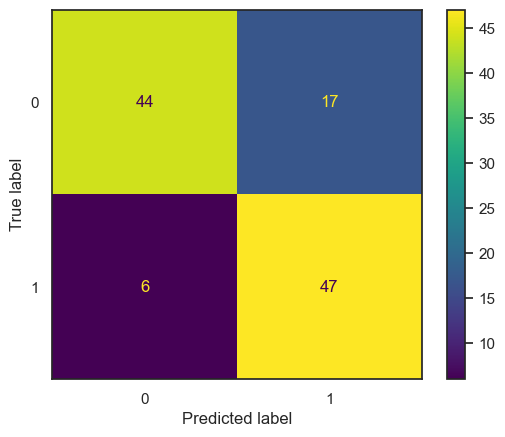

None
              precision    recall  f1-score   support

         HGG       0.88      0.72      0.79        61
         LGG       0.73      0.89      0.80        53

    accuracy                           0.80       114
   macro avg       0.81      0.80      0.80       114
weighted avg       0.81      0.80      0.80       114



In [49]:
lr2 = load('LR2.joblib')
y_pred = lr2.predict(X_test2)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### C. Features selection with Logistic Regression

In [50]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#lr_clf = LogisticRegression(random_state=42)

#param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    #'C': [0.5,1,1.5,2,3], 'multi_class': ['auto', 'ovr', 'multinomial']}

#CV_lrc3 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_lrc3.fit(X_train3, y_train1.diagnostic)
#print("Best Parameters:", CV_lrc3.best_params_)
#print("Best Score:", CV_lrc3.best_score_)

The optimal configuration is `C: 2`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [51]:
lr3 =  LogisticRegression(C=2, multi_class='multinomial', solver='lbfgs', random_state=42)
lr3.fit(X_train3, y_train1.diagnostic)

LogisticRegression(C=2, multi_class='multinomial', random_state=42)

In [52]:
#save the model to not run everything from scratch
dump(lr3, 'LR3.joblib')

['LR3.joblib']

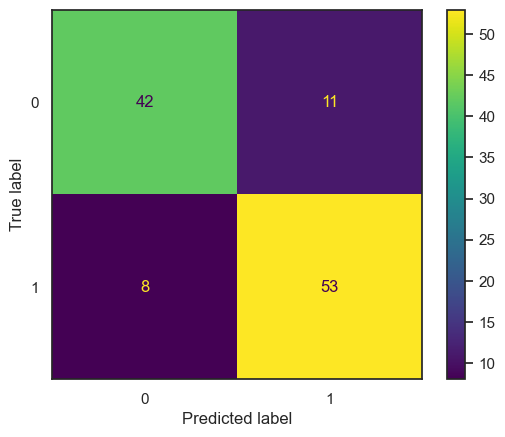

None
              precision    recall  f1-score   support

         HGG       0.84      0.79      0.82        53
         LGG       0.83      0.87      0.85        61

    accuracy                           0.83       114
   macro avg       0.83      0.83      0.83       114
weighted avg       0.83      0.83      0.83       114



In [53]:
lr3 = load('LR3.joblib')
y_pred = lr3.predict(X_test3)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### D. Features selection with Correlation

In [54]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#lr_clf = LogisticRegression(random_state=42)

#param_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'C': [0.5,1,1.5,2,],
#'multi_class': ['auto', 'ovr', 'multinomial']}

#CV_lrc4 = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv= 5, scoring=scorer)
#CV_lrc4.fit(X_train4, y_train1.diagnostic)
#print("Best Parameters:", CV_lrc4.best_params_)
#print("Best Score:", CV_lrc4.best_score_)

The optimal configuration is `C: 1.5`, `multi_class: multinomial`, `solver: lbfgs`. We train the model again and we save it to not build it from scratch.

In [55]:
lr4 =  LogisticRegression(C=1.5, multi_class='multinomial', solver='lbfgs', random_state=42)
lr4.fit(X_train4, y_train1.diagnostic)

LogisticRegression(C=1.5, multi_class='multinomial', random_state=42)

In [56]:
#save the model to not run everything from scratch
dump(lr4, 'LR4.joblib')

['LR4.joblib']

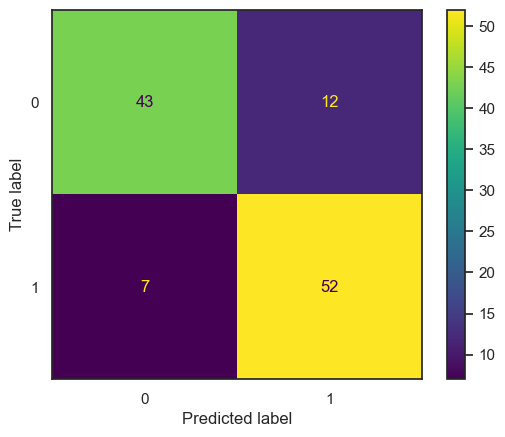

None
              precision    recall  f1-score   support

         HGG       0.86      0.78      0.82        55
         LGG       0.81      0.88      0.85        59

    accuracy                           0.83       114
   macro avg       0.84      0.83      0.83       114
weighted avg       0.84      0.83      0.83       114



In [57]:
lr4 = load('LR4.joblib')
y_pred = lr4.predict(X_test4)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

## 3.3 Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

### A. With no preprocessing

In [59]:
from sklearn.model_selection import GridSearchCV

#dt1_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
#param_grid = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    #'min_samples_split': [5, 10, 20],  'min_samples_leaf': [2, 5, 10],  'max_features': ['sqrt', 'log2']}

#CV_dt_clf = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring=scorer)

#CV_dt_clf.fit(X_train1, y_train1.diagnostic)

#print("Best Parameters:", CV_dt_clf.best_params_)
#print("Best Score:", CV_dt_clf.best_score_)


In [60]:
# Create a Decision Tree classifier with the best parameters
dt1_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    random_state=42
)

# Fit the model to the training data
dt1_clf.fit(X_train1, y_train1.diagnostic)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

In [61]:
dump(dt1_clf, 'DT1.joblib')

['DT1.joblib']

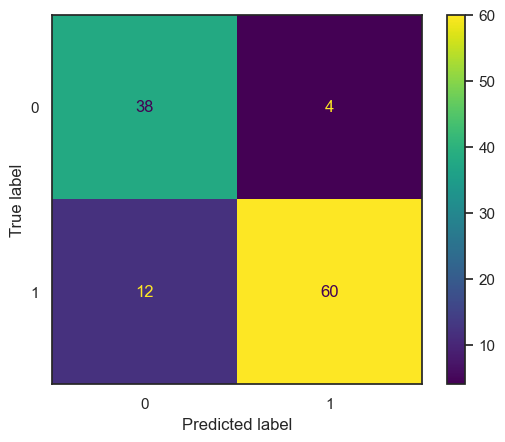

None
              precision    recall  f1-score   support

         HGG       0.76      0.90      0.83        42
         LGG       0.94      0.83      0.88        72

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.85       114
weighted avg       0.87      0.86      0.86       114



In [62]:
dt1 = load('DT1.joblib')
y_pred_dt = dt1.predict(X_test1)

print(evaluate_classifier(y_pred_dt, y_test1))
print(classification_report(y_pred_dt, y_test1))

In [63]:
f1_score(y_test1,y_pred_dt, average="binary", pos_label="HGG")

0.8260869565217391

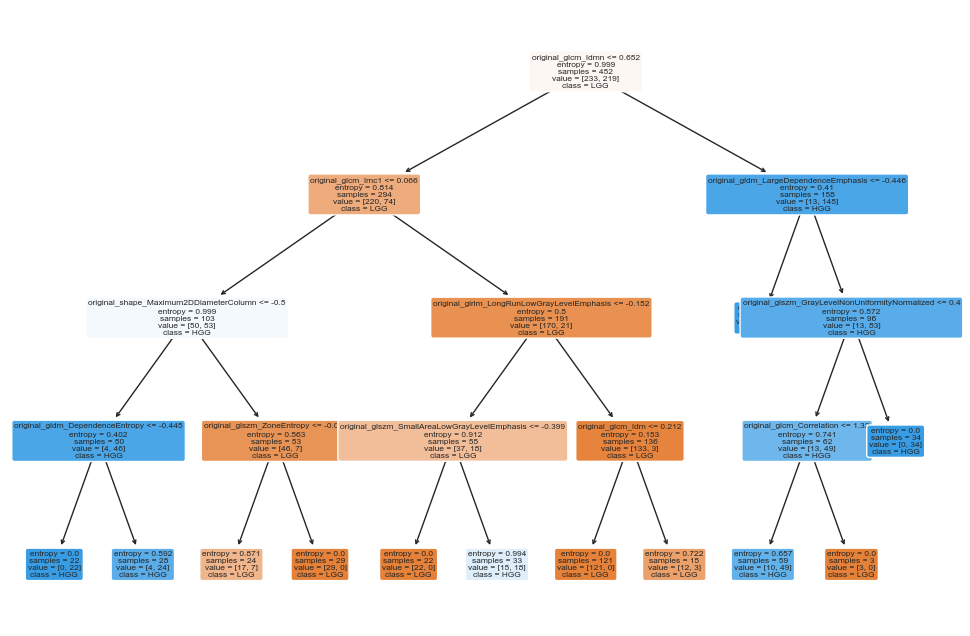

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt1_clf, filled=True, feature_names=X_train1.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [65]:
from sklearn.tree import export_text

# Extract the trained decision tree
tree_model_dt1 = dt1_clf

# Visualize the rules of the tree
tree_rules_dt1 = export_text(tree_model_dt1, feature_names=list(X_train1.columns))
print("Rules of Decision Tree (dt1_clf):\n", tree_rules_dt1)


Rules of Decision Tree (dt1_clf):
 |--- original_glcm_Idmn <= 0.65
|   |--- original_glcm_Imc1 <= 0.07
|   |   |--- original_shape_Maximum2DDiameterColumn <= -0.50
|   |   |   |--- original_gldm_DependenceEntropy <= -0.45
|   |   |   |   |--- class: LGG
|   |   |   |--- original_gldm_DependenceEntropy >  -0.45
|   |   |   |   |--- class: LGG
|   |   |--- original_shape_Maximum2DDiameterColumn >  -0.50
|   |   |   |--- original_glszm_ZoneEntropy <= -0.01
|   |   |   |   |--- class: HGG
|   |   |   |--- original_glszm_ZoneEntropy >  -0.01
|   |   |   |   |--- class: HGG
|   |--- original_glcm_Imc1 >  0.07
|   |   |--- original_glrlm_LongRunLowGrayLevelEmphasis <= -0.15
|   |   |   |--- original_glszm_SmallAreaLowGrayLevelEmphasis <= -0.40
|   |   |   |   |--- class: HGG
|   |   |   |--- original_glszm_SmallAreaLowGrayLevelEmphasis >  -0.40
|   |   |   |   |--- class: LGG
|   |   |--- original_glrlm_LongRunLowGrayLevelEmphasis >  -0.15
|   |   |   |--- original_glcm_Idm <= 0.21
|   |   | 

### B. Features selection with PCA

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier
dt2_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
#param_grid_dt = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    #'min_samples_split': [5, 10, 20], 'min_samples_leaf': [2, 5, 10], 'max_features': ['sqrt', 'log2']}

# Create GridSearchCV object
#CV_dt2_clf = GridSearchCV(estimator=dt2_clf, param_grid=param_grid_dt, cv=5, scoring=scorer)

# Fit the model to the training data
#CV_dt2_clf.fit(X_train2, y_train2.diagnostic)

# Print the best parameters and best score
#print("Best Parameters:", CV_dt2_clf.best_params_)
#print("Best Score:", CV_dt2_clf.best_score_)


In [67]:
dt2_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=5,
    random_state=42
)

dt2_clf.fit(X_train2, y_train2.diagnostic)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

In [68]:
dump(dt2_clf, 'DT2.joblib')

['DT2.joblib']

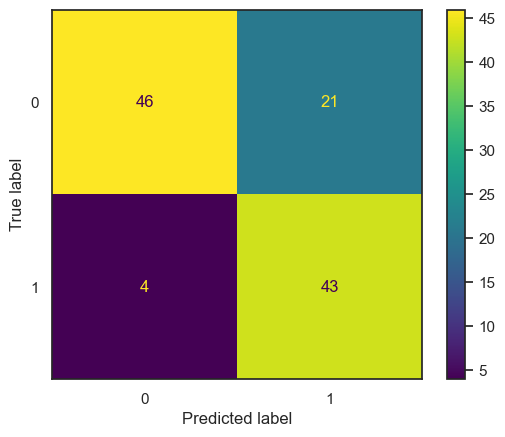

None
              precision    recall  f1-score   support

         HGG       0.92      0.69      0.79        67
         LGG       0.67      0.91      0.77        47

    accuracy                           0.78       114
   macro avg       0.80      0.80      0.78       114
weighted avg       0.82      0.78      0.78       114



In [69]:
dt2_clf = load('DT2.joblib')
y_pred_dt2 = dt2_clf.predict(X_test2)

print(evaluate_classifier(y_pred_dt2, y_test2))
print(classification_report(y_pred_dt2, y_test2))

In [70]:
f1_score(y_test2,y_pred_dt2, average="binary", pos_label="HGG")

0.7863247863247863

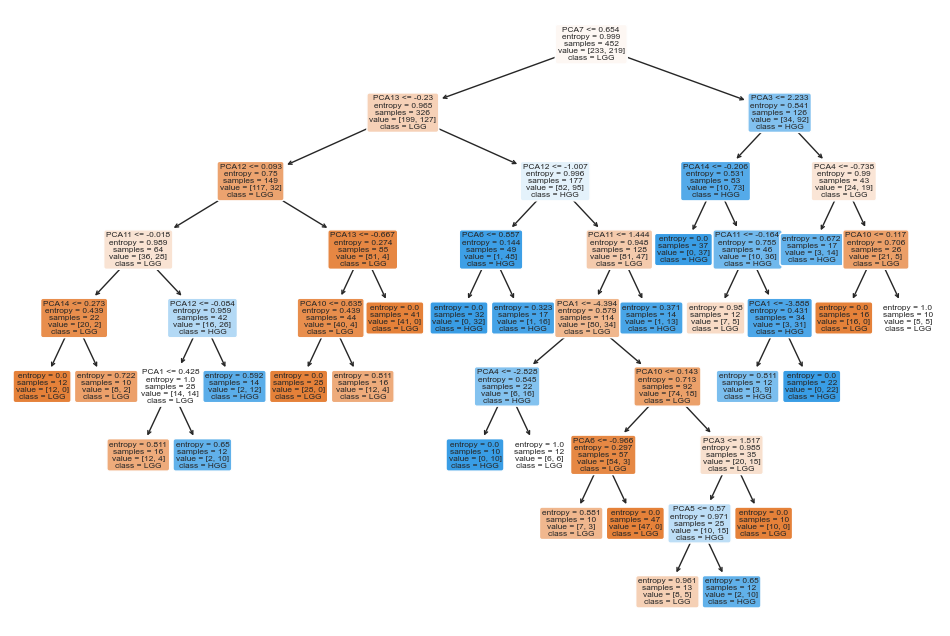

In [71]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt2_clf, filled=True, feature_names=X_train2.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [72]:
from sklearn.tree import export_text

tree_model_dt2 = dt2_clf

tree_rules_dt2 = export_text(tree_model_dt2, feature_names=list(X_train2.columns))
print("Rules of Decision Tree (dt2_clf):\n", tree_rules_dt2)


Rules of Decision Tree (dt2_clf):
 |--- PCA7 <= 0.65
|   |--- PCA13 <= -0.23
|   |   |--- PCA12 <= 0.09
|   |   |   |--- PCA11 <= -0.02
|   |   |   |   |--- PCA14 <= 0.27
|   |   |   |   |   |--- class: HGG
|   |   |   |   |--- PCA14 >  0.27
|   |   |   |   |   |--- class: HGG
|   |   |   |--- PCA11 >  -0.02
|   |   |   |   |--- PCA12 <= -0.08
|   |   |   |   |   |--- PCA1 <= 0.43
|   |   |   |   |   |   |--- class: HGG
|   |   |   |   |   |--- PCA1 >  0.43
|   |   |   |   |   |   |--- class: LGG
|   |   |   |   |--- PCA12 >  -0.08
|   |   |   |   |   |--- class: LGG
|   |   |--- PCA12 >  0.09
|   |   |   |--- PCA13 <= -0.67
|   |   |   |   |--- PCA10 <= 0.63
|   |   |   |   |   |--- class: HGG
|   |   |   |   |--- PCA10 >  0.63
|   |   |   |   |   |--- class: HGG
|   |   |   |--- PCA13 >  -0.67
|   |   |   |   |--- class: HGG
|   |--- PCA13 >  -0.23
|   |   |--- PCA12 <= -1.01
|   |   |   |--- PCA6 <= 0.86
|   |   |   |   |--- class: LGG
|   |   |   |--- PCA6 >  0.86
|   |   |   |   |

### C. Feature Selection Logistic Regression

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree classifier
#dt3_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
#param_grid_dt = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    #'min_samples_split': [5, 10, 20], 'min_samples_leaf': [2, 5, 10],'max_features': ['sqrt', 'log2']}

# Create the GridSearchCV object
#CV_dt3_clf = GridSearchCV(estimator=dt3_clf, param_grid=param_grid_dt, cv=5, scoring=scorer)

# Fit the model
#CV_dt3_clf.fit(X_train3, y_train1.diagnostic)

# Print the best parameters and score
#print("Best Parameters:", CV_dt3_clf.best_params_)
#print("Best Score:", CV_dt3_clf.best_score_)


In [74]:
dt3_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=9,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

dt3_clf.fit(X_train3, y_train2.diagnostic)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [75]:
dump(dt3_clf, 'DT3.joblib')

['DT3.joblib']

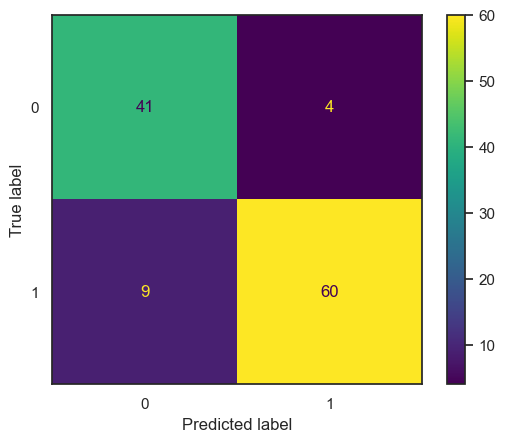

None
              precision    recall  f1-score   support

         HGG       0.82      0.91      0.86        45
         LGG       0.94      0.87      0.90        69

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



In [76]:
dt3_clf = load('DT3.joblib')
y_pred3 = dt3_clf.predict(X_test3)

print(evaluate_classifier(y_pred3, y_test1))
print(classification_report(y_pred3, y_test1))

In [77]:
f1_score(y_test1,y_pred3, average="binary", pos_label="HGG")

0.8631578947368421

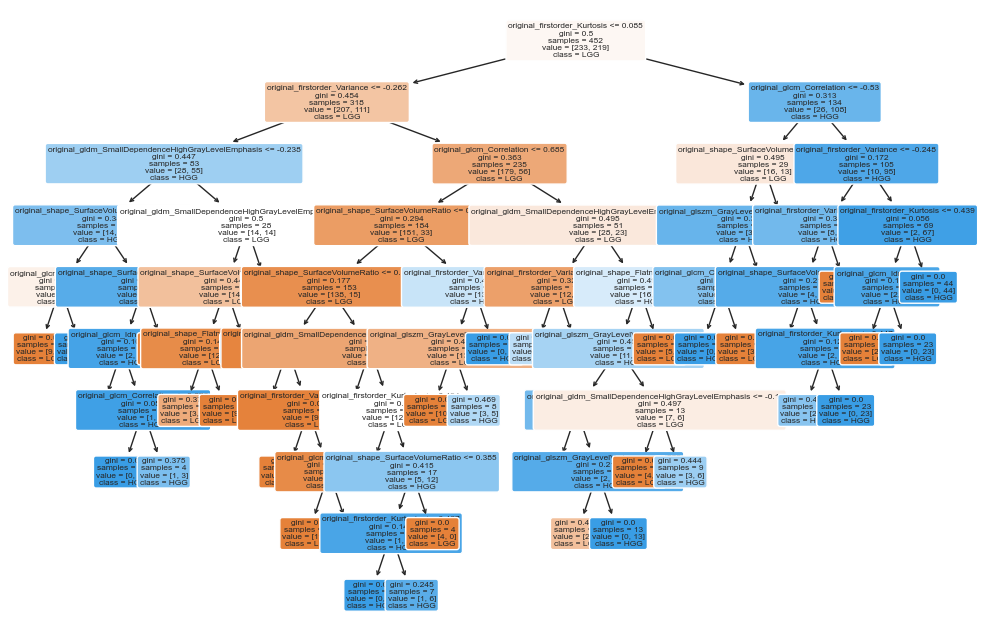

In [78]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt3_clf, filled=True, feature_names=X_train3.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [79]:
from sklearn.tree import export_text
tree_model_dt3 = dt3_clf

tree_rules_dt3 = export_text(tree_model_dt3, feature_names=list(X_train3.columns))
print("Rules of Decision Tree (dt3_clf):\n", tree_rules_dt3)

Rules of Decision Tree (dt3_clf):
 |--- original_firstorder_Kurtosis <= 0.08
|   |--- original_firstorder_Variance <= -0.26
|   |   |--- original_gldm_SmallDependenceHighGrayLevelEmphasis <= -0.24
|   |   |   |--- original_shape_SurfaceVolumeRatio <= -0.40
|   |   |   |   |--- original_glcm_Idn <= 0.78
|   |   |   |   |   |--- class: HGG
|   |   |   |   |--- original_glcm_Idn >  0.78
|   |   |   |   |   |--- class: LGG
|   |   |   |--- original_shape_SurfaceVolumeRatio >  -0.40
|   |   |   |   |--- original_shape_SurfaceVolumeRatio <= 1.04
|   |   |   |   |   |--- original_glcm_Idn <= -0.08
|   |   |   |   |   |   |--- class: HGG
|   |   |   |   |   |--- original_glcm_Idn >  -0.08
|   |   |   |   |   |   |--- original_glcm_Correlation <= 0.68
|   |   |   |   |   |   |   |--- class: LGG
|   |   |   |   |   |   |--- original_glcm_Correlation >  0.68
|   |   |   |   |   |   |   |--- class: LGG
|   |   |   |   |--- original_shape_SurfaceVolumeRatio >  1.04
|   |   |   |   |   |--- class: H

### D. Feature Selection with Correlation

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree classifier
#dt4_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
#param_grid_dt = {'max_depth': list(range(2, 11)), 'criterion': ['gini', 'entropy'],
    #'min_samples_split': [5, 10, 20], 'min_samples_leaf': [2, 5, 10], 'max_features': ['sqrt', 'log2']}

# Create the GridSearchCV object
#CV_dt4_clf = GridSearchCV(estimator=dt4_clf, param_grid=param_grid_dt, cv=5, scoring=scorer)

# Fit the model
#CV_dt4_clf.fit(X_train4, y_train1.diagnostic)

# Print the best parameters and score
#print("Best Parameters:", CV_dt4_clf.best_params_)
#print("Best Score:", CV_dt4_clf.best_score_)


In [81]:
dt4_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=9,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

dt4_clf.fit(X_train4, y_train2.diagnostic)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [82]:
dump(dt4_clf, 'DT4.joblib')

['DT4.joblib']

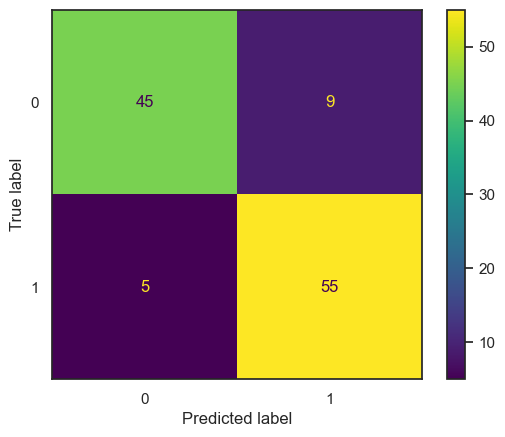

None
              precision    recall  f1-score   support

         HGG       0.90      0.83      0.87        54
         LGG       0.86      0.92      0.89        60

    accuracy                           0.88       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.88      0.88      0.88       114



In [83]:
dt4_clf = load('DT4.joblib')
y_pred4 = dt4_clf.predict(X_test4)

print(evaluate_classifier(y_pred4, y_test1))
print(classification_report(y_pred4, y_test1))

In [84]:
f1_score(y_test1,y_pred4, average="binary", pos_label="HGG")

0.8653846153846153

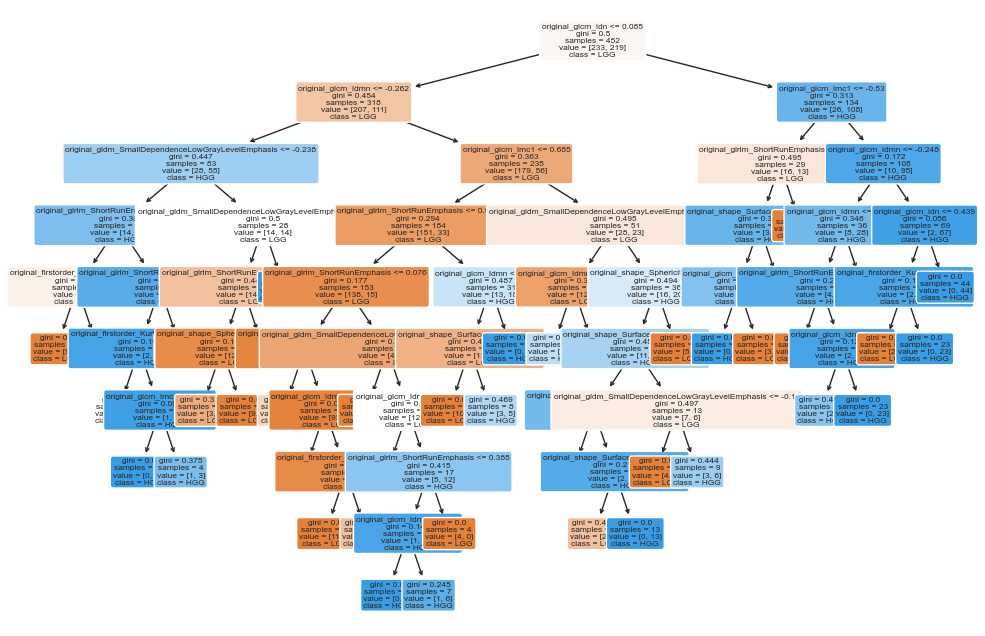

In [85]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt3_clf, filled=True, feature_names=X_train4.columns, class_names=['LGG', 'HGG'], rounded=True, fontsize=6)
plt.show()

In [86]:
from sklearn.tree import export_text
tree_model_dt4 = dt4_clf

tree_rules_dt4 = export_text(tree_model_dt4, feature_names=list(X_train4.columns))
print("Rules of Decision Tree (dt4_clf):\n", tree_rules_dt4)

Rules of Decision Tree (dt4_clf):
 |--- original_glcm_Idn <= 0.55
|   |--- original_glrlm_RunLengthNonUniformityNormalized <= -0.32
|   |   |--- original_glrlm_GrayLevelNonUniformity <= -0.11
|   |   |   |--- original_glcm_Idn <= -0.17
|   |   |   |   |--- class: HGG
|   |   |   |--- original_glcm_Idn >  -0.17
|   |   |   |   |--- original_glszm_LargeAreaHighGrayLevelEmphasis <= -0.35
|   |   |   |   |   |--- class: LGG
|   |   |   |   |--- original_glszm_LargeAreaHighGrayLevelEmphasis >  -0.35
|   |   |   |   |   |--- class: LGG
|   |   |--- original_glrlm_GrayLevelNonUniformity >  -0.11
|   |   |   |--- original_gldm_SmallDependenceLowGrayLevelEmphasis <= 0.96
|   |   |   |   |--- class: HGG
|   |   |   |--- original_gldm_SmallDependenceLowGrayLevelEmphasis >  0.96
|   |   |   |   |--- class: HGG
|   |--- original_glrlm_RunLengthNonUniformityNormalized >  -0.32
|   |   |--- original_glrlm_GrayLevelNonUniformity <= -0.90
|   |   |   |--- class: LGG
|   |   |--- original_glrlm_GrayLeve

## 3.4 Explainable Boosting Machine classifier

In [87]:
#!pip install interpret

In [88]:
from interpret.glassbox import ExplainableBoostingClassifier

### A. With no preprocessing

In [89]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc1 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_ebc1.fit(X_train1, y_train1.diagnostic)
print("Best Score:", CV_ebc1.best_score_)

Best Score: 0.924790479292189


In [90]:
#save the model to not run everything from scratch
dump(CV_ebc1, 'eb1.joblib')

['eb1.joblib']

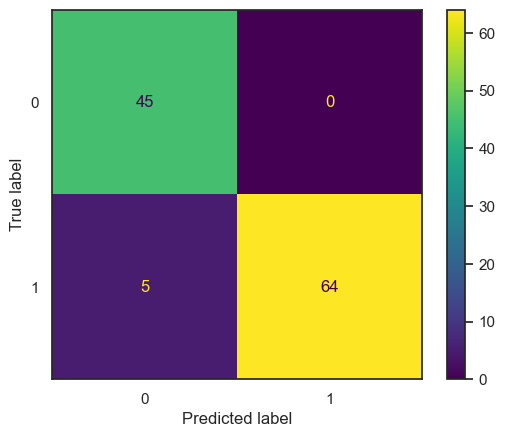

None
              precision    recall  f1-score   support

         HGG       0.90      1.00      0.95        45
         LGG       1.00      0.93      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [91]:
eb1 = load('eb1.joblib')
y_pred = eb1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### B. Feature selection with PCA

In [92]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc2 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_ebc2.fit(X_train2, y_train1.diagnostic)
print("Best Score:", CV_ebc2.best_score_)

Best Score: 0.9108568497203027


In [93]:
#save the model to not run everything from scratch
dump(CV_ebc2, 'eb2.joblib')

['eb2.joblib']

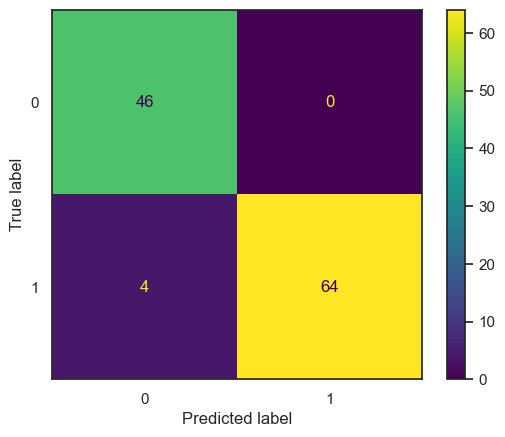

None
              precision    recall  f1-score   support

         HGG       0.92      1.00      0.96        46
         LGG       1.00      0.94      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [94]:
eb2 = load('eb2.joblib')
y_pred = eb2.predict(X_test2)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### C. Feature selection with Logistic Regression

In [95]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc3 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_ebc3.fit(X_train3, y_train1.diagnostic)
print("Best Score:", CV_ebc3.best_score_)

Best Score: 0.9130615483806974


In [96]:
#save the model to not run everything from scratch
dump(CV_ebc3, 'eb3.joblib')

['eb3.joblib']

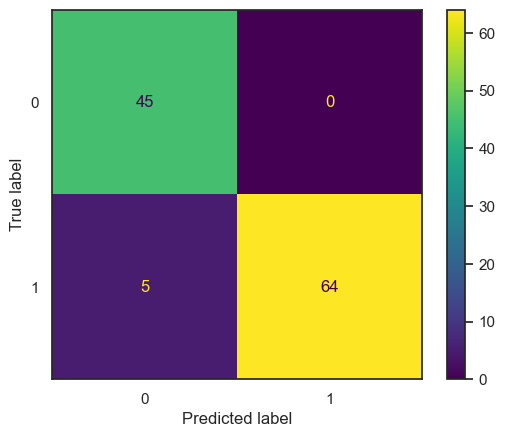

None
              precision    recall  f1-score   support

         HGG       0.90      1.00      0.95        45
         LGG       1.00      0.93      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [97]:
eb3 = load('eb3.joblib')
y_pred = eb3.predict(X_test3)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

### D. Feature selection with Correlation

In [98]:
from sklearn.model_selection import GridSearchCV
eb_clf = ExplainableBoostingClassifier(random_state=42)
param_grid = {}
CV_ebc4 = GridSearchCV(estimator=eb_clf, param_grid=param_grid, cv= 5, scoring=scorer)
CV_ebc4.fit(X_train4, y_train1.diagnostic)
print("Best Score:", CV_ebc4.best_score_)

Best Score: 0.932325218476904


In [99]:
#save the model to not run everything from scratch
dump(CV_ebc4, 'eb4.joblib')

['eb4.joblib']

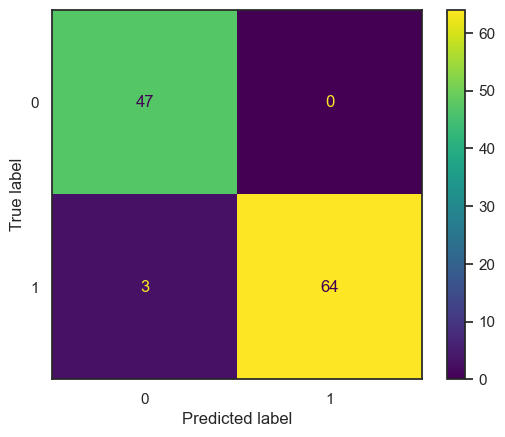

None
              precision    recall  f1-score   support

         HGG       0.94      1.00      0.97        47
         LGG       1.00      0.96      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [100]:
eb4 = load('eb4.joblib')
y_pred = eb4.predict(X_test4)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

## BEST MODEL
It's important to highlight that th

In [101]:
from sklearn.metrics import f1_score, accuracy_score
from joblib import load

def best_model(model, X_test, y_test, num_runs=5):
    model = load(model)
    f1_scores = []
    accuracies = []
    
    for i in range(num_runs):
        y_pred = model.predict(X_test)
        
        f1 = f1_score(y_test, y_pred, average='macro')
        f1_scores.append(f1)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    mean_f1_score = sum(f1_scores) / len(f1_scores)
    mean_accuracy = sum(accuracies) / len(accuracies)
    
    print(f"Model: {model}  --> F1-Score: {round(mean_f1_score,2)} | Accuracy: {round(mean_accuracy,2)}")

In [102]:
models = [(X_test1, 'RF1.joblib'), (X_test2, 'RF2.joblib'), (X_test3, 'RF3.joblib'), (X_test4, 'RF4.joblib'),
          (X_test1, 'LR1.joblib'), (X_test2, 'LR2.joblib'), (X_test3, 'LR3.joblib'), (X_test4, 'LR4.joblib'),
          (X_test1, 'DT1.joblib'), (X_test2, 'DT2.joblib'), (X_test3, 'DT3.joblib'), (X_test4, 'DT4.joblib'),
          (X_test1, 'eb1.joblib'), (X_test2, 'eb2.joblib'), (X_test3, 'eb3.joblib'), (X_test4, 'eb4.joblib')]

for dataset, model in models:
    best_model(model, dataset, y_test1, 10)

Model: RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)  --> F1-Score: 0.94 | Accuracy: 0.94
Model: RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)  --> F1-Score: 0.95 | Accuracy: 0.95
Model: RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)  --> F1-Score: 0.94 | Accuracy: 0.94
Model: RandomForestClassifier(criterion='entropy', max_depth=9, random_state=42)  --> F1-Score: 0.96 | Accuracy: 0.96
Model: LogisticRegression(C=5, multi_class='multinomial', random_state=42,
                   solver='newton-cg')  --> F1-Score: 0.96 | Accuracy: 0.96
Model: LogisticRegression(C=0.01, multi_class='multinomial', random_state=42)  --> F1-Score: 0.8 | Accuracy: 0.8
Model: LogisticRegression(C=2, multi_class='multinomial', random_state=42)  --> F1-Score: 0.83 | Accuracy: 0.83
Model: LogisticRegressi

### Obtaining information from the best model

In [103]:
print(X_test3.columns)

Index(['original_firstorder_Kurtosis', 'original_firstorder_Variance',
       'original_glcm_Correlation', 'original_glcm_Idn',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_glszm_GrayLevelVariance', 'original_shape_Flatness',
       'original_shape_SurfaceVolumeRatio'],
      dtype='object')


In [106]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
set_visualize_provider(InlineProvider())

best_estimator = CV_ebc3.best_estimator_
explanation = best_estimator.explain_global()

show(explanation)